In [1]:
import pandas as pd
import numpy as np
import ast
import re

# Load the gyroscope dataset (update the path as needed)
df = pd.read_csv("gps_labeled.csv")

# List of gyroscope columns to update
gps_columns = ["lat", "lon", "speed" ]

def compute_list_mean(cell):
    """
    Convert a string representation of a list to an actual list,
    then convert each element to float and compute the mean.
    If the cell represents an empty list or conversion fails, return np.nan.
    """
    # If the cell is missing, return NaN
    if pd.isnull(cell):
        return np.nan
    
    # If the cell is a string, remove whitespace and check if it equals "[]"
    if isinstance(cell, str):
        if re.sub(r"\s+", "", cell) == "[]":
            return np.nan

    try:
        # Convert the cell (if string) to an actual list
        lst = ast.literal_eval(cell)
    except Exception:
        return np.nan

    # If the list is empty, return NaN
    if not lst:
        return np.nan

    try:
        # Convert each element in the list to a float
        float_lst = [float(x) for x in lst]
    except Exception:
        return np.nan

    return np.mean(float_lst)

# Process each gyroscope column and update the original column
for col in gps_columns:
    # Compute the mean for each row in the column
    computed_means = df[col].apply(compute_list_mean)
    
    # Compute the overall mean from the computed values (ignoring NaNs)
    overall_mean = computed_means.mean()
    
    # Replace any NaN (from empty lists or conversion errors) with the overall mean
    computed_means.fillna(overall_mean, inplace=True)
    
    # Update the original column with the computed means
    df[col] = computed_means

# Save the updated dataset to a new CSV file
output_path = "gps_data_cleaned.csv"
df.to_csv(output_path, index=False)

print("Gps dataset cleaned successfully. Blank list values have been replaced with the computed mean values.")


Gps dataset cleaned successfully. Blank list values have been replaced with the computed mean values.


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("gps_data_cleaned.csv")
df

,lat,lon,speed,label
0,52.443822,13.527620,3.014528,1
1,52.439721,13.534201,11.432550,1
2,48.163165,12.358065,0.834973,1
3,48.163165,12.358065,0.834973,1
4,52.565530,13.423241,0.018357,1
...,...,...,...,...
245,48.163165,12.358065,0.834973,3
246,48.163165,12.358065,0.834973,3
247,48.163165,12.358065,0.834973,3
248,52.429782,13.531464,0.000000,3


In [29]:
print(df.shape)
df.info()

(250, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     250 non-null    float64
 1   lon     250 non-null    float64
 2   speed   250 non-null    float64
 3   label   250 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 7.9 KB


In [30]:
df.describe()

,lat,lon,speed,label
count,250.000000,250.000000,250.000000,250.000000
mean,48.163165,12.358065,0.834973,2.156000
std,10.732355,2.753479,1.268442,0.875632
min,0.000000,0.000000,0.000000,1.000000
25%,48.163165,12.358065,0.000000,1.000000
50%,52.428531,13.423082,0.834973,2.000000
75%,52.565502,13.424069,0.834973,3.000000
max,52.565700,13.540184,11.432550,3.000000


In [31]:
X = df[['lat', 'lon','speed']].values

In [32]:
y =df[["label"]].values

In [33]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
svc = SVC()
svc.fit(X_train, y_train)
y2_pred = svc.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y2_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.50      0.07      0.12        15
           3       0.38      0.95      0.54        19

    accuracy                           0.38        50
   macro avg       0.29      0.34      0.22        50
weighted avg       0.29      0.38      0.24        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarni

In [35]:
accuracy_score(y2_pred,y_test, normalize=True)

0.38

<Axes: >

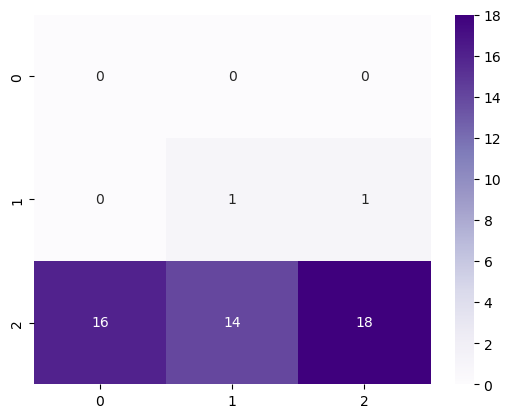

In [36]:
import seaborn as sns
con=sm.confusion_matrix(y2_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y3_pred = dtc.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y3_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.47      0.50      0.48        16
           2       0.33      0.07      0.11        15
           3       0.43      0.68      0.53        19

    accuracy                           0.44        50
   macro avg       0.41      0.42      0.38        50
weighted avg       0.42      0.44      0.39        50



In [38]:
accuracy_score(y3_pred,y_test, normalize=True)

0.44

<Axes: >

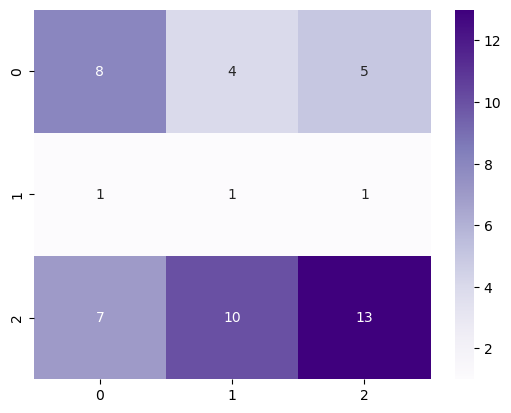

In [39]:
con=sm.confusion_matrix(y3_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [40]:
import time
start_rfc = time.time()
rfc = RandomForestClassifier(random_state=0, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)
end_rfc = time.time()
final_rfc = end_rfc - start_rfc
final_rfc = round(final_rfc,3)
y4_pred = rfc.predict(X_test)

C:\Users\91977\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [41]:
print("Computation time                    : {}Sec".format(final_rfc))
print("Classification Report:\n",classification_report(y_test, y4_pred))

Computation time                    : 0.475Sec
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.38      0.50        16
           2       0.50      0.07      0.12        15
           3       0.45      0.95      0.61        19

    accuracy                           0.50        50
   macro avg       0.57      0.46      0.41        50
weighted avg       0.56      0.50      0.43        50



In [42]:
accuracy_score(y4_pred,y_test, normalize=True)

0.5

<Axes: >

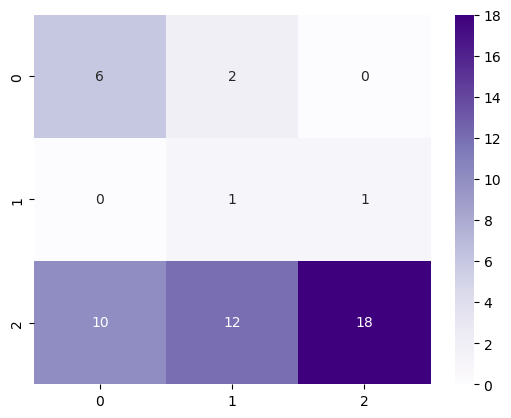

In [43]:
con=sm.confusion_matrix(y4_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [44]:
nbmod=GaussianNB()
nbmod.fit(X_train,y_train)
y5_pred = nbmod.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y5_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.25      0.35        16
           2       0.50      0.07      0.12        15
           3       0.44      0.95      0.60        19

    accuracy                           0.46        50
   macro avg       0.50      0.42      0.36        50
weighted avg       0.50      0.46      0.37        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
accuracy_score(y5_pred,y_test, normalize=True)

0.46

<Axes: >

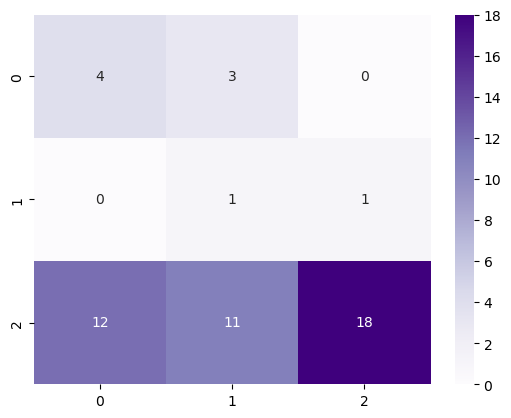

In [46]:
con=sm.confusion_matrix(y5_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

In [47]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y6_pred = knn.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y6_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.56      0.58        16
           2       0.00      0.00      0.00        15
           3       0.46      0.84      0.59        19

    accuracy                           0.50        50
   macro avg       0.35      0.47      0.39        50
weighted avg       0.37      0.50      0.41        50



C:\Users\91977\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarnin

In [48]:
accuracy_score(y6_pred,y_test, normalize=True)

0.5

<Axes: >

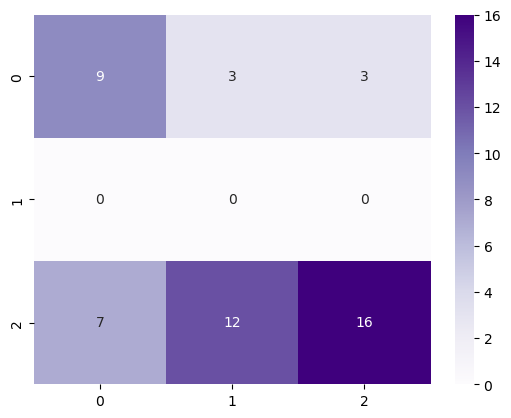

In [49]:
con=sm.confusion_matrix(y6_pred,y_test)
sns.heatmap(con,annot=True,cmap='Purples')

Missing values in each column:
lat      0
lon      0
speed    0
label    0
dtype: int64

Basic statistics:
              lat         lon       speed       label
count  250.000000  250.000000  250.000000  250.000000
mean    48.163165   12.358065    0.834973    2.156000
std     10.732355    2.753479    1.268442    0.875632
min      0.000000    0.000000    0.000000    1.000000
25%     48.163165   12.358065    0.000000    1.000000
50%     52.428531   13.423082    0.834973    2.000000
75%     52.565502   13.424069    0.834973    3.000000
max     52.565700   13.540184   11.432550    3.000000

Class distribution:
label
3    118
1     79
2     53
Name: count, dtype: int64


C:\Users\91977\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 0.5506 - loss: 1.0602 - val_accuracy: 0.4348 - val_loss: 1.0793
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4994 - loss: 1.0466 - val_accuracy: 0.4348 - val_loss: 1.0823
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4890 - loss: 1.0546 - val_accuracy: 0.4348 - val_loss: 1.0773
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4865 - loss: 1.0532 - val_accuracy: 0.4348 - val_loss: 1.0664
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5465 - loss: 0.9985 - val_accuracy: 0.4348 - val_loss: 1.0641
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5091 - loss: 1.0370 - val_accuracy: 0.4348 - val_loss: 1.0616
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5113 - loss: 1.0375 - val_accuracy: 0.4348 - val_loss: 1.0625
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5343 - loss: 1.0195 - val_accuracy: 0.4348 - val_loss: 1.0657

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


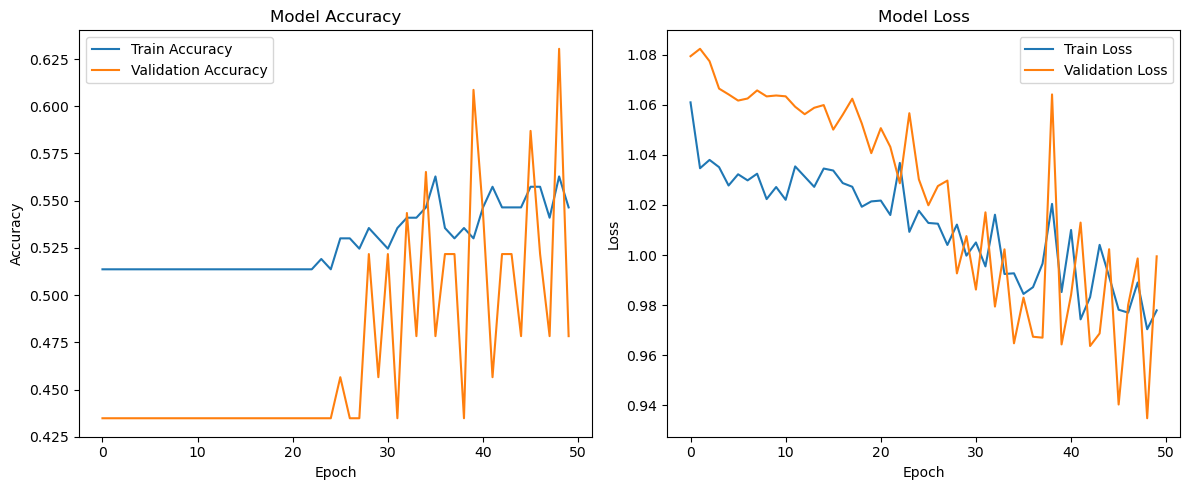


Model and preprocessing objects saved. Use 'predict_next_label' function to make predictions on new data.


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('gps_data_cleaned.csv')

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Basic statistics of the data
print("\nBasic statistics:")
print(data.describe())

# Check class distribution
print("\nClass distribution:")
print(data['label'].value_counts())

# Drop rows with lat and lon equal to 0,0 as they appear to be invalid GPS points
data = data[(data['lat'] != 0.0) | (data['lon'] != 0.0)]

# Create sequences for LSTM
def create_sequences(data, sequence_length=10):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        # Take sequence_length consecutive data points for input features
        seq = data.iloc[i:i+sequence_length, 0:3].values  # lat, lon, speed
        label = data.iloc[i+sequence_length, 3]  # label
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

# Normalize the features
scaler = MinMaxScaler()
data[['lat', 'lon', 'speed']] = scaler.fit_transform(data[['lat', 'lon', 'speed']])

# Create sequences
sequence_length = 10  # Looking at the previous 10 GPS points to predict the next label
X, y = create_sequences(data, sequence_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
y = to_categorical(y, num_classes=num_classes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 3), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Convert back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred_classes)
y_test_original = label_encoder.inverse_transform(y_test_classes)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to predict new sequences
def predict_next_label(new_sequence):
    """
    Predict the label for a new sequence of GPS data
    
    Parameters:
    new_sequence: numpy array of shape (sequence_length, 3) with lat, lon, speed values
    
    Returns:
    predicted_label: The predicted label (1, 2, or 3)
    """
    # Normalize the input
    new_sequence_normalized = scaler.transform(new_sequence)
    # Reshape for LSTM input (adding batch dimension)
    new_sequence_normalized = new_sequence_normalized.reshape(1, sequence_length, 3)
    # Get prediction
    prediction = model.predict(new_sequence_normalized)
    predicted_class = np.argmax(prediction, axis=1)[0]
    # Convert back to original label
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    return predicted_label

# Save the model and preprocessing objects for future use
model.save('gps_lstm_model.h5')
import pickle
with open('preprocessing_objects.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,
        'label_encoder': label_encoder,
        'sequence_length': sequence_length
    }, f)

print("\nModel and preprocessing objects saved. Use 'predict_next_label' function to make predictions on new data.")

In [54]:
from sklearn.cluster import KMeans
import numpy as np



# Reshape to 2D (100 samples, 784 features)
X = X.reshape(X.shape[0], -1)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91977\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

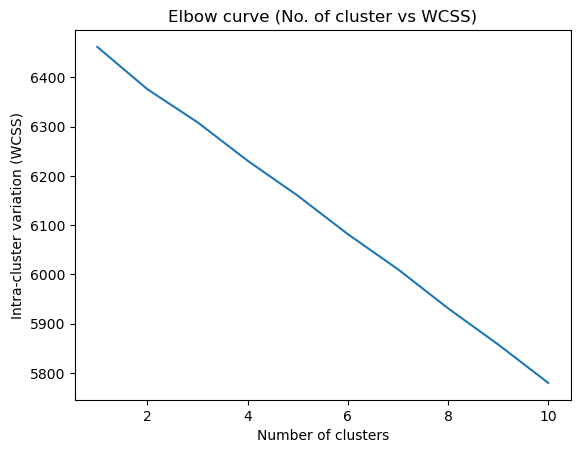

In [55]:
# Plotting the resulting curve 
plt.plot(range(1, 11), wcss)
plt.title('Elbow curve (No. of cluster vs WCSS)')
plt.xlabel('Number of clusters')
plt.ylabel('Intra-cluster variation (WCSS)') # Within cluster sum of squares
plt.show()